In [17]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
#import osmnx # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
import xml.etree.ElementTree as ET
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

In [24]:
pip install fastkml

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.2 MB/s eta 0:00:0000:01
  Created wheel for pygeoif: filename=pygeoif-0.7-py3-none-any.whl size=19000 sha256=4d4de3638465ce753acbcf0cb69f9c02a8d79264a87ef1859724322a08cc6086
  Stored in directory: /Users/anavera/Library/Caches/pip/wheels/1f/03/f4/8041459258b17a1bc9c057a947cc1841a21084b8c8f06877c3
Successfully built pygeoif
Note: you may need to restart the kernel to use updated packages.


In [28]:
from fastkml import kml
import geopandas as gpd

def kml_to_geodataframe(kml_file_path):
    # Read the KML file
    with open(kml_file_path, 'r', encoding='utf-8') as kml_file:
        kml_content = kml_file.read()

    # Create a KML object
    k = kml.KML()
    k.from_string(kml_content)

    # Assume the first feature is the Document
    doc = list(k.features())[0]

    # Initialize an empty list to hold geometries and properties
    data = []

    # Iterate through all placemarks in the Document
    for placemark in doc.features():
        geom = placemark.geometry
        name = placemark.name  # Optional: extract name
        
        # Check if the geometry is a LineString, adjust as needed
        if geom.geom_type == 'LineString':
            # If it's a LineString, proceed normally
            data.append({'geometry': geom, 'name': name})
        elif geom.geom_type == 'Polygon':
            # Optional: If it's a Polygon but expected to be a LineString, convert the exterior to a LineString
            exterior = geom.exterior
            line = LineString(exterior.coords)
            data.append({'geometry': line, 'name': name})
        else:
            # For other types, you might want to handle them differently or skip
            continue

    # Convert the list of dictionaries to a GeoDataFrame
    gdf = gpd.GeoDataFrame(data, columns=['geometry', 'name'])

    return gdf

# Convert KML to GeoDataFrame for each of your files
left_boundary_gdf = kml_to_geodataframe("Left_boundary_track.kml")
right_boundary_gdf = kml_to_geodataframe("Right_boundary_track.kml")

# Example usage of the GeoDataFrames
print(left_boundary_gdf.head())
print(right_boundary_gdf.head())


                                            geometry  name
0  LINESTRING Z (6.94555 50.33408 0.00000, 6.9458...  left
                                            geometry              name
0  LINESTRING Z (6.94724 50.33538 0.00000, 6.9475...  Untitled polygon


In [29]:
left_boundary_gdf.geometry.head()

0    LINESTRING Z (6.94555 50.33408 0.00000, 6.9458...
Name: geometry, dtype: geometry

<Axes: >

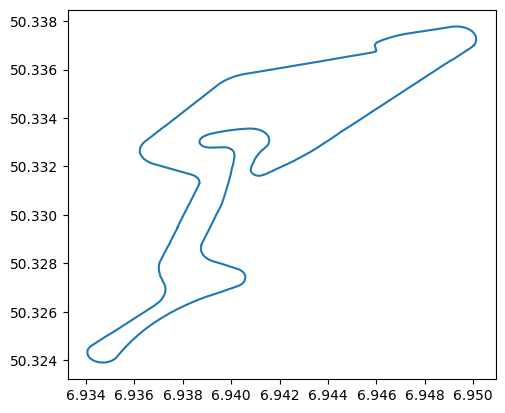

In [30]:
left_boundary_gdf.plot()

<Axes: >

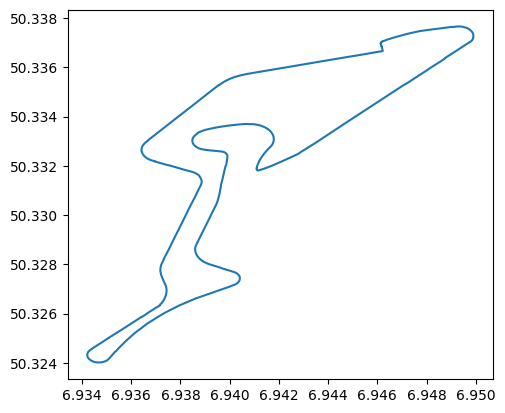

In [33]:
right_boundary_gdf.plot()